<a href="https://colab.research.google.com/github/iyakiwan/NN-tensorflow/blob/master/NNImageClasificationSRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libary yang di perlukan
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Mengecek versi tensorflow
print(tf.__version__)

2.2.0


In [ ]:
#upload file ke directory google colab
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-06-29 17:52:41--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  12.1MB/s    in 66s     

2020-06-29 17:53:48 (4.67 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
#Exstract file zip 
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
pip install split-folders

In [ ]:
#membagi dataset menjadi train set dan validation set
import split_folders

split_folders.ratio('/tmp/rockpaperscissors/rps-cv-images', output="/tmp/rockpaperscissors/data", seed=1337, ratio=(.8, .2))

Copying files: 2188 files [00:00, 2830.85 files/s]


In [ ]:
#Variabel untuk train set dan validation set
base_dir = '/tmp/rockpaperscissors/data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
#mengecek isi dari folder train
os.listdir(train_dir)

['scissors', 'paper', 'rock']

In [ ]:
#mengecek isi dari folder validation
os.listdir(validation_dir)

['scissors', 'paper', 'rock']

In [ ]:
#Augmentasi gambar menggunakan image data generator
datagen = ImageDataGenerator(
                    rescale = 1./255,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode = 'nearest')

In [ ]:
#Mmembuat persiapan data berdasarkan direktori
train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=(200, 300),
        batch_size=6,
        class_mode='categorical')
 
validation_generator = datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 300), 
        batch_size=6, 
        class_mode='categorical')

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [ ]:
#Membuat model sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
#menetukan loss function serta optimizer 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
#pelatihan model dengan 50 step yang mengambil jumlah data set tertinggi yaitu scission sebanyak 750
history = model.fit(
    train_generator,
    steps_per_epoch=50, 
    epochs=36,
    validation_data=validation_generator,
    validation_steps=12,
    verbose=2)

Epoch 1/36
50/50 - 47s - loss: 1.1080 - accuracy: 0.3567 - val_loss: 1.0975 - val_accuracy: 0.3750
Epoch 2/36
50/50 - 47s - loss: 1.0999 - accuracy: 0.2533 - val_loss: 1.0953 - val_accuracy: 0.3889
Epoch 3/36
50/50 - 47s - loss: 1.0415 - accuracy: 0.4411 - val_loss: 1.0008 - val_accuracy: 0.5417
Epoch 4/36
50/50 - 47s - loss: 0.8784 - accuracy: 0.6229 - val_loss: 0.5962 - val_accuracy: 0.7917
Epoch 5/36
50/50 - 47s - loss: 0.5168 - accuracy: 0.8000 - val_loss: 0.5693 - val_accuracy: 0.7639
Epoch 6/36
50/50 - 49s - loss: 0.3515 - accuracy: 0.8567 - val_loss: 0.4799 - val_accuracy: 0.8333
Epoch 7/36
50/50 - 47s - loss: 0.3399 - accuracy: 0.8900 - val_loss: 0.3370 - val_accuracy: 0.8194
Epoch 8/36
50/50 - 47s - loss: 0.3980 - accuracy: 0.8600 - val_loss: 0.3702 - val_accuracy: 0.9028
Epoch 9/36
50/50 - 47s - loss: 0.2463 - accuracy: 0.9100 - val_loss: 0.1959 - val_accuracy: 0.9444
Epoch 10/36
50/50 - 47s - loss: 0.2218 - accuracy: 0.9233 - val_loss: 0.2759 - val_accuracy: 0.9028
Epoch 11/

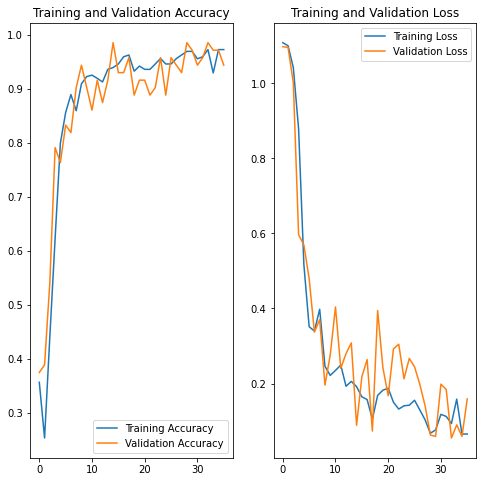

In [ ]:
#Melihat grafik dari actuasi train dan val serta lossnya
import matplotlib.pyplot as plt
epochs = 36

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving WhatsApp Image 2020-06-29 at 23.54.10.jpeg to WhatsApp Image 2020-06-29 at 23.54.10.jpeg
WhatsApp Image 2020-06-29 at 23.54.10.jpeg
paper


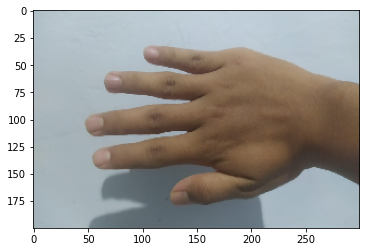

In [ ]:
#proses testing menggunakan data gambar yang ada
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)

  # print(classes)
  
  if classes[0,0]==1:
    print('paper')
  elif classes[0,1]==1:
    print('rock')
  elif classes[0,2]==1:
    print('scissors')
  else:
    print('error')